<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Pore_pressure_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

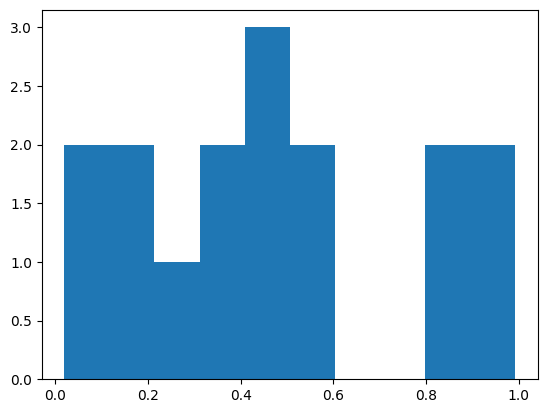

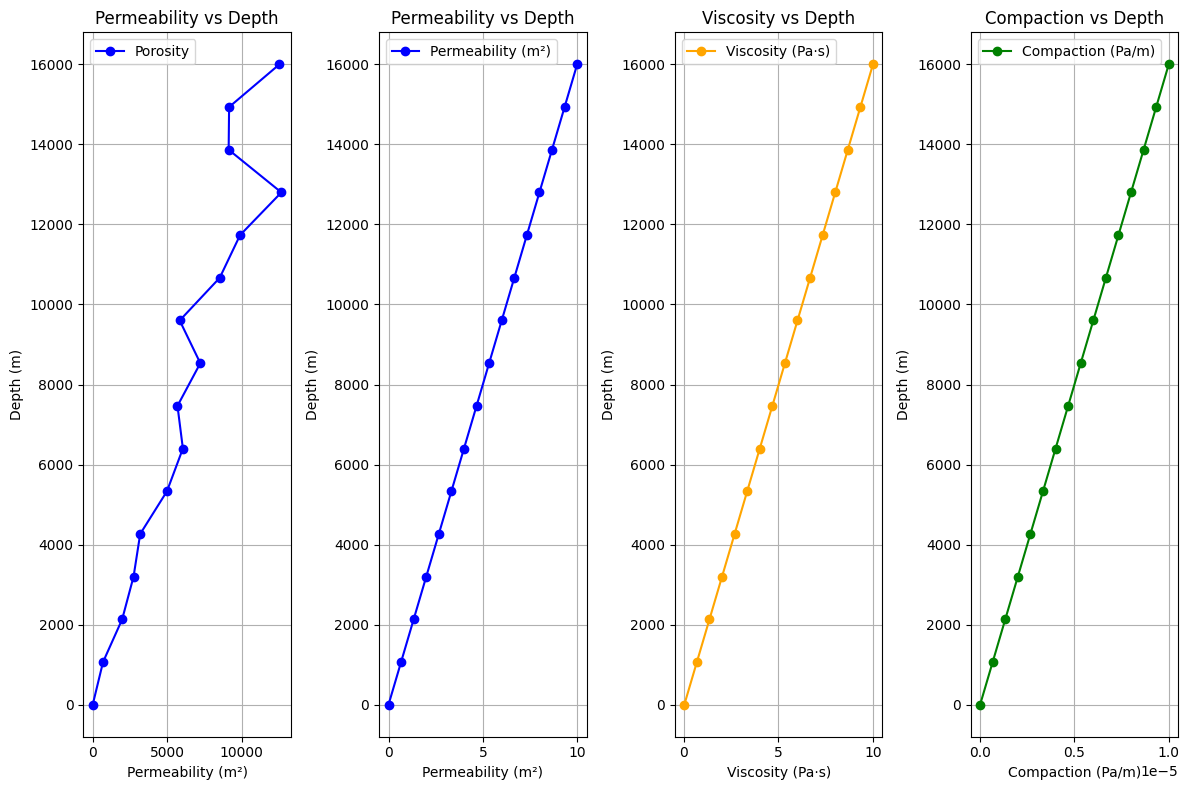

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for each layer
N = 16
depths = np.linspace(0, 16000, N)  # Depth boundaries
permeabilities = np.linspace(10e-10, 10e0, N)  # Permeability in m²
viscosities = np.linspace(2e-2, 10e0, N)  # Viscosity in Pa·s
compactions = np.linspace(0e-5, 1e-5, N)  # Compaction in Pa/m
# Generate random porosity values between 0 and 1
porosity_initial = np.random.rand(N)  # Random values in range [0, 1)
plt.hist(porosity_initial)


def porosity():
  alpha = 0.5
  porosity = [phi0_values * np.exp(-alpha*depth_values) for depth_values, phi0_values in zip(porosity_initial, depths)]
  return porosity


# Create a figure for vertical line plots
plt.figure(figsize=(12, 8))

# Depth vs Permeability (Vertical Plot)
plt.subplot(1, 4, 1)
plt.plot(porosity(), depths, marker='o', label='Porosity', color='blue')
plt.title('Permeability vs Depth')
plt.xlabel('Permeability (m²)')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

# Depth vs Permeability (Vertical Plot)
plt.subplot(1, 4, 2)
plt.plot(permeabilities, depths, marker='o', label='Permeability (m²)', color='blue')
plt.title('Permeability vs Depth')
plt.xlabel('Permeability (m²)')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

# Depth vs Viscosity (Vertical Plot)
plt.subplot(1, 4, 3)
plt.plot(viscosities, depths, marker='o', color='orange', label='Viscosity (Pa·s)')
plt.title('Viscosity vs Depth')
plt.xlabel('Viscosity (Pa·s)')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

# Depth vs Compaction (Vertical Plot)
plt.subplot(1, 4, 4)
plt.plot(compactions, depths, marker='o', color='green', label='Compaction (Pa/m)')
plt.title('Compaction vs Depth')
plt.xlabel('Compaction (Pa/m)')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Pore Pressure at each layer:
Depth: 0.0 Pore Pressure: 1000.0 Top BC: 1000 Bottom BC: 2000
Depth: 5333.333333333333 Pore Pressure: -8.81954722659652e-11 Top BC: 1000 Bottom BC: 2000
Depth: 10666.666666666666 Pore Pressure: 1.0474613781748196e-12 Top BC: 1000 Bottom BC: 2000
Depth: 16000.0 Pore Pressure: 2000.0 Top BC: 1000 Bottom BC: 2000


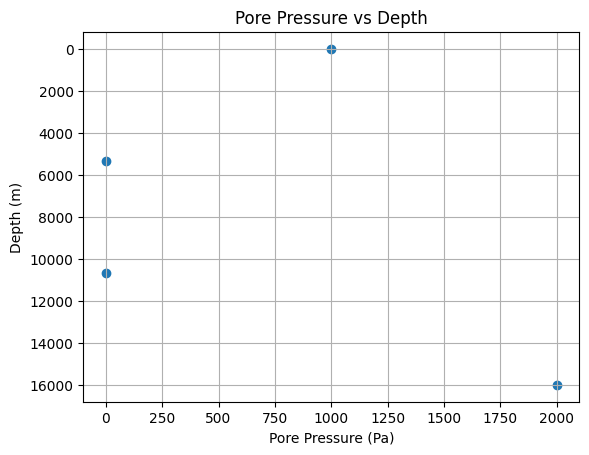

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for each layer
N = 4
depths = np.linspace(0, 16000, N)  # Depth boundaries
permeabilities = np.linspace(10e-10, 10e0, N)  # Permeability in m²
viscosities = np.linspace(2e-2, 10e0, N)  # Viscosity in Pa·s
compactions = np.linspace(0e-5, 1e-5, N)  # Compaction in Pa/m

# Generate random porosity values between 0 and 1
porosity_initial = np.random.rand(N)  # Random values in range [0, 1)

# Discretize the depth for numerical solution
dz = depths[1] - depths[0]

# Initialize pore pressure array with boundary conditions
pore_pressure = np.zeros(N)

# Define boundary conditions for each layer (example values)
top_boundary_conditions = np.array([1000] * N)  # Example pressure at the top of each layer
bottom_boundary_conditions = np.array([2000] * N)  # Example pressure at the bottom of each layer

# Set initial pressures based on boundary conditions
pore_pressure[0] = top_boundary_conditions[0]  # Top of the first layer
pore_pressure[-1] = bottom_boundary_conditions[-1]  # Bottom of the last layer

# Time step (adjust as needed for stability)
dt = 1e-6

# Constants (replace with your actual values)
c = 1.0  # Compressibility (replace with actual value)

# Finite difference method for solving the equation
for t in range(100):  # Number of time steps (adjust as needed)
    for i in range(1, N - 1):
        # Calculate the gradient of K/v
        grad_kv = (permeabilities[i + 1] / viscosities[i + 1] - permeabilities[i - 1] / viscosities[i - 1]) / (2 * dz)

        # Calculate the gradient of pore pressure using central difference
        gradu = (pore_pressure[i + 1] - pore_pressure[i - 1]) / (2 * dz)

        # Calculate d(u_l)/dt (replace with actual expression if available)
        dul_dt = 0.0

        # Solve for du/dt from the original equation
        du_dt = (1 - porosity_initial[i]) / c * (grad_kv * gradu / viscosities[i] + dul_dt)

        # Update pore pressure for the next time step using Forward Euler
        pore_pressure[i] += du_dt * dt

    # Apply boundary conditions after updating pressures
    pore_pressure[0] = top_boundary_conditions[0]
    pore_pressure[-1] = bottom_boundary_conditions[-1]

# Print or plot the results
print("Pore Pressure at each layer:")
for i in range(N):
    print("Depth:", depths[i], "Pore Pressure:", pore_pressure[i], "Top BC:", top_boundary_conditions[i], "Bottom BC:", bottom_boundary_conditions[i])

# Plotting results
plt.scatter(pore_pressure, depths)
plt.xlabel("Pore Pressure (Pa)")
plt.ylabel("Depth (m)")
plt.title("Pore Pressure vs Depth")
plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards
plt.grid()
plt.show()

Pore Pressure at each layer:
Depth: 0.0 Pore Pressure: 1000.0
Depth: 1066.6666666666667 Pore Pressure: -2.1126104029955846e-08
Depth: 2133.3333333333335 Pore Pressure: 2.6558330571770936e-21
Depth: 3200.0 Pore Pressure: -2.4482771415918556e-36
Depth: 4266.666666666667 Pore Pressure: 3.9039285227915244e-52
Depth: 5333.333333333334 Pore Pressure: -2.0003706656064682e-67
Depth: 6400.0 Pore Pressure: 1.5596637347547313e-82
Depth: 7466.666666666667 Pore Pressure: -6.062277107505975e-98
Depth: 8533.333333333334 Pore Pressure: 8.180903758293637e-108
Depth: 9600.0 Pore Pressure: 1.5771787875128387e-92
Depth: 10666.666666666668 Pore Pressure: 1.1435048469222493e-76
Depth: 11733.333333333334 Pore Pressure: 1.2538826727842449e-60
Depth: 12800.0 Pore Pressure: 6.859236281095272e-45
Depth: 13866.666666666668 Pore Pressure: 1.9003847002837886e-29
Depth: 14933.333333333334 Pore Pressure: 1.11389976309776e-12
Depth: 16000.0 Pore Pressure: 2000.0


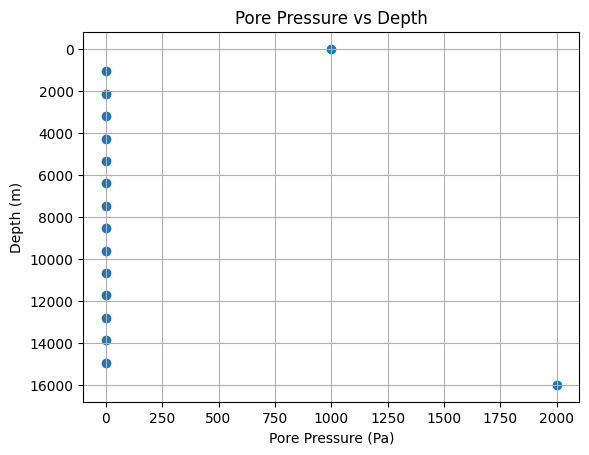

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for each layer
N = 16
depths = np.linspace(0, 16000, N)  # Depth boundaries
permeabilities = np.linspace(10e-10, 10e0, N)  # Permeability in m²
viscosities = np.linspace(2e-2, 10e0, N)  # Viscosity in Pa·s
compactions = np.linspace(0e-5, 1e-5, N)  # Compaction in Pa/m

# Generate random porosity values between 0 and 1
porosity_initial = np.random.rand(N)  # Random values in range [0, 1)

# Discretize the depth for numerical solution
dz = depths[1] - depths[0]

# Initialize pore pressure array with boundary conditions
pore_pressure = np.zeros(N)
pore_pressure[0] = 1000  # Example initial pressure at the top (boundary condition)
pore_pressure[-1] = 2000  # Example initial pressure at the bottom (boundary condition)

# Time step (adjust as needed for stability)
dt = 1e-6

# Constants (replace with your actual values)
c = 1.0  # Compressibility (replace with actual value)

# Finite difference method for solving the equation
for t in range(100):  # Number of time steps (adjust as needed)
    for i in range(1, N - 1):
        # Calculate the gradient of K/v
        grad_kv = (permeabilities[i + 1] / viscosities[i + 1] - permeabilities[i - 1] / viscosities[i - 1]) / (2 * dz)

        # Calculate the gradient of pore pressure using central difference
        gradu = (pore_pressure[i + 1] - pore_pressure[i - 1]) / (2 * dz)

        # Calculate d(u_l)/dt (replace with actual expression if available)
        dul_dt = 0.0

        # Solve for du/dt from the original equation considering layer thickness
        du_dt = (1 - porosity_initial[i]) / c * (grad_kv * gradu / viscosities[i] + dul_dt)

        # Update pore pressure for the next time step using Forward Euler
        pore_pressure[i] += du_dt * dt

# Print or plot the results
print("Pore Pressure at each layer:")
for i in range(N):
    print("Depth:", depths[i], "Pore Pressure:", pore_pressure[i])

# Plotting results
plt.scatter(pore_pressure, depths)
plt.xlabel("Pore Pressure (Pa)")
plt.ylabel("Depth (m)")
plt.title("Pore Pressure vs Depth")
plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards
plt.grid()
plt.show()

Layer 1: Depth Range 0 - 2000 m | Pore Pressure: 100000.01 Pa
Layer 2: Depth Range 2000 - 4000 m | Pore Pressure: 100000.02 Pa
Layer 3: Depth Range 4000 - 6000 m | Pore Pressure: 100000.02 Pa
Layer 4: Depth Range 6000 - 8000 m | Pore Pressure: 100000.03 Pa
Layer 5: Depth Range 8000 - 10000 m | Pore Pressure: 100000.01 Pa


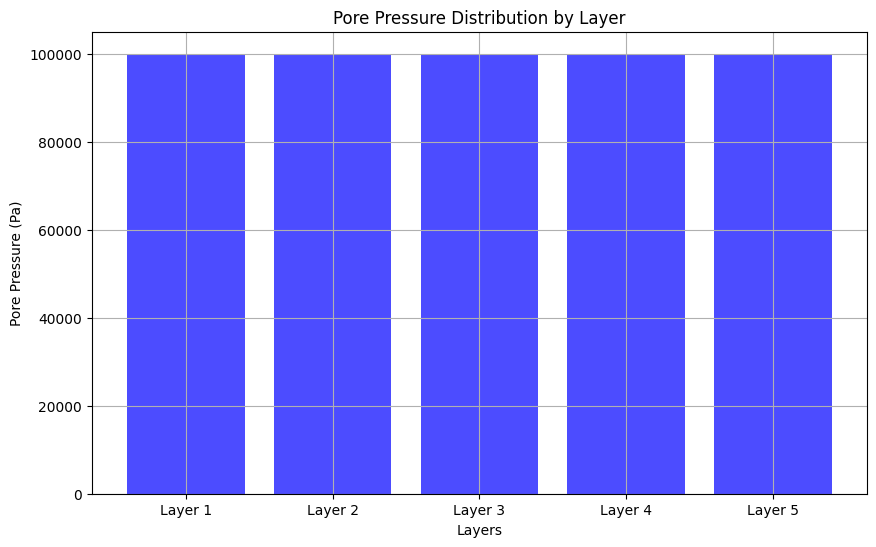

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of layers
num_layers = 5

# Define parameters for each layer
depths = np.array([0, 2000, 4000, 6000, 8000, 10000])  # Depth boundaries
permeabilities = np.array([10000, 1000, 100, 100, 1])  # Permeability in m²
viscosities = np.array([1e-3, 1e-3, 1.1e-3, 1.2e-3, 1.3e-3])  # Viscosity in Pa·s
compactions = np.array([1/1e5, 0.8/1e5, 0.5/1e5, 0.4/1e5, 0.1/1e5])  # Compaction in Pa/m

# Initial conditions
P_initial = 100000  # Initial uniform pressure in Pascals
P = np.zeros(num_layers)  # Array to store pore pressure for each layer

# Calculate pore pressure for each layer
for i in range(num_layers):
    # Calculate the average depth of the layer
    depth_mid = (depths[i] + depths[i + 1]) / 2

    # Calculate hydrostatic pressure at mid-depth
    hydrostatic_pressure = P_initial + (depth_mid * compactions[i])

    # Update pore pressure for current layer
    P[i] = hydrostatic_pressure

# Display results
for i in range(num_layers):
    print(f'Layer {i + 1}: Depth Range {depths[i]} - {depths[i + 1]} m | Pore Pressure: {P[i]:.2f} Pa')

# Plotting results
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_layers), P, color='blue', alpha=0.7)
plt.xticks(np.arange(num_layers), [f'Layer {i + 1}' for i in range(num_layers)])
plt.title('Pore Pressure Distribution by Layer')
plt.xlabel('Layers')
plt.ylabel('Pore Pressure (Pa)')
plt.grid()
plt.show()

Layer 1: Depth Range 0 - 2000 m | Pore Pressure: 100000.01 Pa
Layer 2: Depth Range 2000 - 4000 m | Pore Pressure: 100000.02 Pa
Layer 3: Depth Range 4000 - 6000 m | Pore Pressure: 100000.02 Pa
Layer 4: Depth Range 6000 - 8000 m | Pore Pressure: 100000.03 Pa
Layer 5: Depth Range 8000 - 10000 m | Pore Pressure: 100000.01 Pa


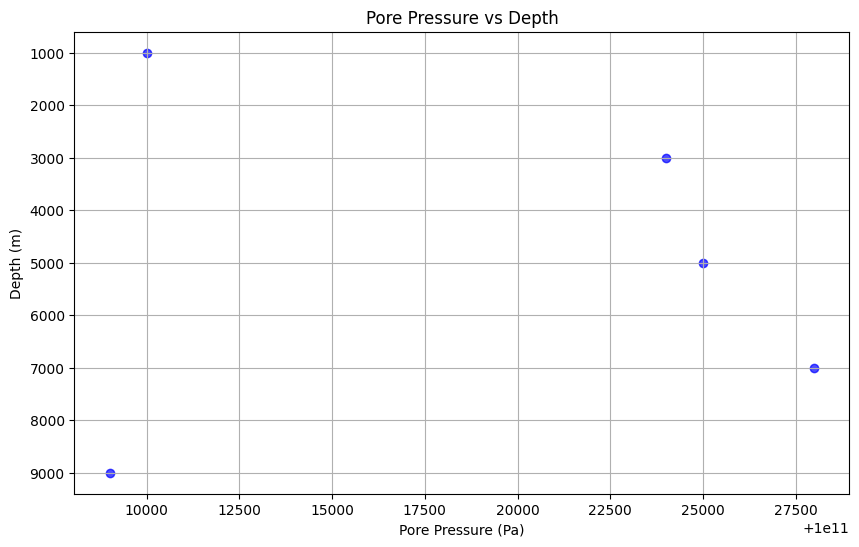

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of layers
num_layers = 5

# Define parameters for each layer
depths = np.array([0, 2000, 4000, 6000, 8000, 10000])  # Depth boundaries
permeabilities = np.array([10000, 1000, 100, 100, 1])  # Permeability in m²
viscosities = np.array([1e-3, 1e-3, 1.1e-3, 1.2e-3, 1.3e-3])  # Viscosity in Pa·s
compactions = np.array([1/1e5, 0.8/1e5, 0.5/1e5, 0.4/1e5, 0.1/1e5])  # Compaction in Pa/m

# Initial conditions
P_initial = 100000  # Initial uniform pressure in Pascals
P = np.zeros(num_layers)  # Array to store pore pressure for each layer

# Calculate pore pressure for each layer
for i in range(num_layers):
    # Calculate the average depth of the layer
    depth_mid = (depths[i] + depths[i + 1]) / 2

    # Calculate hydrostatic pressure at mid-depth
    hydrostatic_pressure = P_initial + (depth_mid * compactions[i])

    # Update pore pressure for current layer
    P[i] = hydrostatic_pressure

# Display results
for i in range(num_layers):
    print(f'Layer {i + 1}: Depth Range {depths[i]} - {depths[i + 1]} m | Pore Pressure: {P[i]:.2f} Pa')

# Prepare data for scatter plot
depth_midpoints = (depths[:-1] + depths[1:]) / 2  # Midpoints for y-axis

# Scatter plot of pore pressure vs depth
plt.figure(figsize=(10, 6))
plt.scatter(P*10**6, depth_midpoints, color='blue', alpha=0.7)
plt.title('Pore Pressure vs Depth')
plt.xlabel('Pore Pressure (Pa)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.grid()
plt.show()

Layer 1: -0.1000 m^3/s
Layer 2: -0.3333 m^3/s
Layer 3: -0.1875 m^3/s
Total Flow Rate: -0.6208 m^3/s


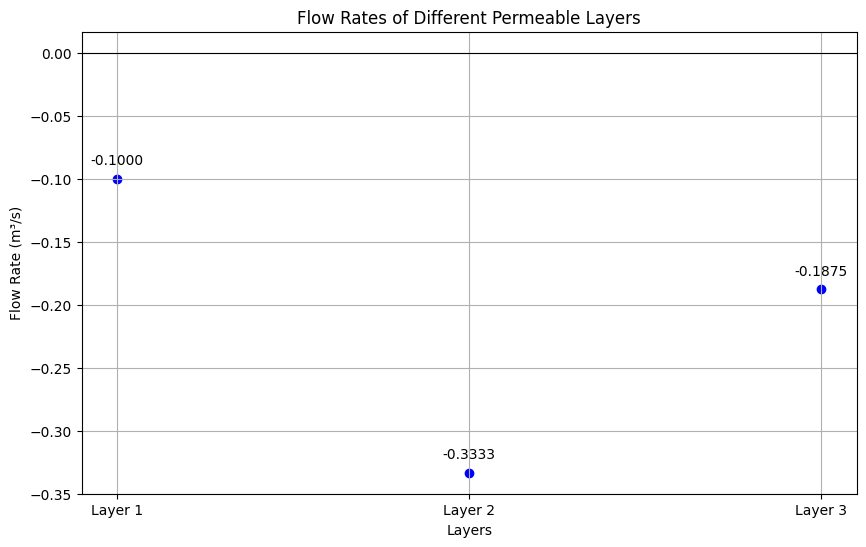

In [ ]:
import matplotlib.pyplot as plt

class LayeredReservoir:
    def __init__(self, layers):
        """
        Initialize with a list of layers.
        Each layer is represented as a tuple (permeability, area, thickness).
        """
        self.layers = layers  # List of tuples (K, A, L)

    def calculate_flow_rates(self, delta_h):
        """
        Calculate flow rates for each layer and total flow rate.

        Parameters:
        delta_h (float): Difference in hydraulic head (m)

        Returns:
        dict: Flow rates for each layer and total flow rate
        """
        flow_rates = {}
        total_flow_rate = 0.0

        for i, (K, A, L) in enumerate(self.layers):
            Q = -K * A * (delta_h / L)
            flow_rates[f'Layer {i+1}'] = Q
            total_flow_rate += Q

        flow_rates['Total Flow Rate'] = total_flow_rate
        return flow_rates

    def plot_flow_rates(self, flow_rates):
        """
        Create a scatter plot of the flow rates for each layer.

        Parameters:
        flow_rates (dict): Dictionary of flow rates for each layer
        """
        layers = list(flow_rates.keys())[:-1]  # Exclude total flow rate
        rates = list(flow_rates.values())[:-1]  # Exclude total flow rate

        plt.figure(figsize=(10, 6))
        plt.scatter(layers, rates, color='blue', marker='o')

        # Adding titles and labels
        plt.title('Flow Rates of Different Permeable Layers')
        plt.xlabel('Layers')
        plt.ylabel('Flow Rate (m³/s)')

        # Annotate points with their values
        for i, rate in enumerate(rates):
            plt.annotate(f'{rate:.4f}', (layers[i], rates[i]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.grid()
        plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
        plt.show()

# Example usage
if __name__ == "__main__":
    # Define layers: (permeability in m/s, area in m^2, thickness in m)
    layers = [
        (0.01, 10.0, 5.0),  # Layer 1
        (0.02, 10.0, 3.0),  # Layer 2
        (0.015, 10.0, 4.0)  # Layer 3
    ]

    reservoir = LayeredReservoir(layers)

    delta_h = 5.0  # Difference in hydraulic head in meters
    results = reservoir.calculate_flow_rates(delta_h)

    for layer, flow_rate in results.items():
        print(f"{layer}: {flow_rate:.4f} m^3/s")

    # Create scatter plot of the flow rates
    reservoir.plot_flow_rates(results)

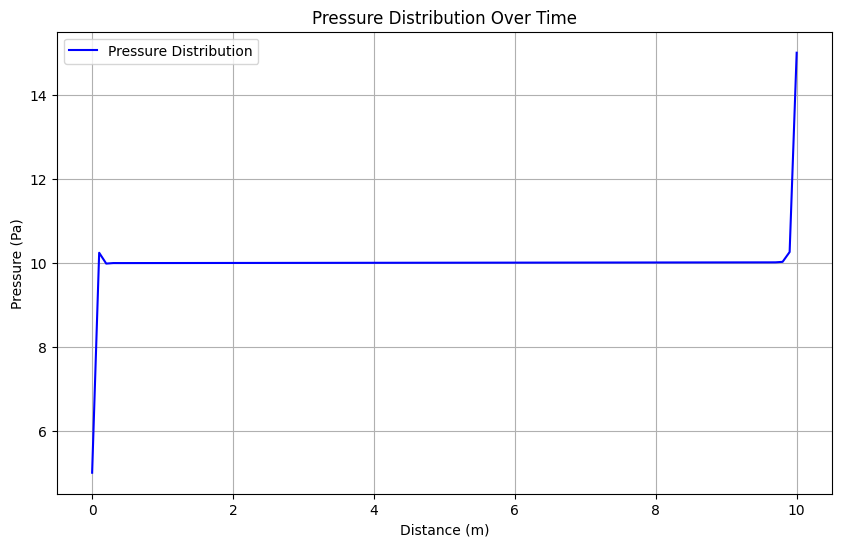

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0          # Constant
phi = 0.2        # Porosity
k = 0.01         # Permeability (m/s)
mu = 1.0         # Viscosity (Pa.s)
L = 10           # Length of reservoir (m)
T = 5            # Total time (s)
dx = 0.1         # Spatial step size (m)
dt = 0.01        # Time step size (s)

# Discretization
x = np.arange(0, L + dx, dx)
time_steps = int(T / dt)
P = np.zeros(len(x))   # Pressure array

# Initial condition with a gradient
P[0] = 5    # Low pressure at one end (boundary condition)
P[-1] = 15  # High pressure at the other end (boundary condition)
# Optionally, you can initialize the interior with a linear gradient
for i in range(1, len(x) - 1):
    P[i] = P[0] + (P[-1] - P[0]) * (i / (len(x) - 1))

# Time-stepping loop
for t in range(time_steps):
    P_new = P.copy()
    for i in range(1, len(x) - 1):
        grad_P = (P[i + 1] - P[i - 1]) / (2 * dx)  # Central difference for gradient
        grad_k_mu = k / mu * grad_P

        # Update rule based on the rearranged equation
        P_new[i] += dt * (C * (10 - P[i]) + grad_k_mu) / (1 - phi)

    P = P_new

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x, P, label='Pressure Distribution', color='blue')
plt.title('Pressure Distribution Over Time')
plt.xlabel('Distance (m)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for each layer: (C, phi, k, mu, thickness)
layers_params = [
    (1.0, 0.2, 0.01, 1.0, 2.0),   # Layer 1
    (1.5, 0.25, 0.02, 1.2, 2.0),   # Layer 2
    (1.2, 0.15, 0.015, 1.1, 2.0),  # Layer 3
    (1.8, 0.3, 0.025, 1.3, 2.0),   # Layer 4
    (1.3, 0.22, 0.018, 1.0, 2.0)   # Layer 5
]

# Total length of the reservoir
total_length = sum(layer[4] for layer in layers_params)

# Time parameters
T = 5            # Total time (s)
dt = 0.01        # Time step size (s)

# Discretization
dx = 0.1         # Spatial step size (m)
x = np.arange(0, total_length + dx, dx)
time_steps = int(T / dt)

# Initialize pressure array for each layer
P = np.zeros(len(x))   # Pressure array

# Assign initial pressure values to each layer
for layer_index, (C, phi, k, mu, thickness) in enumerate(layers_params):
    start_index = int(np.sum([layers_params[i][4] for i in range(layer_index)])) // dx
    end_index = start_index + int(thickness // dx)

    # Ensure slicing indices are integers and prevent out-of-bounds errors
    P[start_index:end_index] = 10 + layer_index * 5  # Different initial pressures for layers

# Time-stepping loop
for t in range(time_steps):
    P_new = P.copy()

    for i in range(1, len(x) - 1):
        # Determine which layer the current index is in
        current_layer_index = next(layer_index for layer_index in range(len(layers_params))
                                    if i * dx < sum(layers_params[j][4] for j in range(layer_index + 1)))

        C, phi, k, mu, thickness = layers_params[current_layer_index]

        grad_P = (P[i + 1] - P[i - 1]) / (2 * dx)      # Central difference for gradient
        grad_k_mu = k / mu * grad_P

        # Update rule based on the rearranged equation
        P_new[i] += dt * (C * (10 - P[i]) + grad_k_mu) / (1 - phi)

    P = P_new

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x, P)
plt.title('Pressure Distribution in a Multi-Layer Reservoir Over Time')
plt.xlabel('Distance (m)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

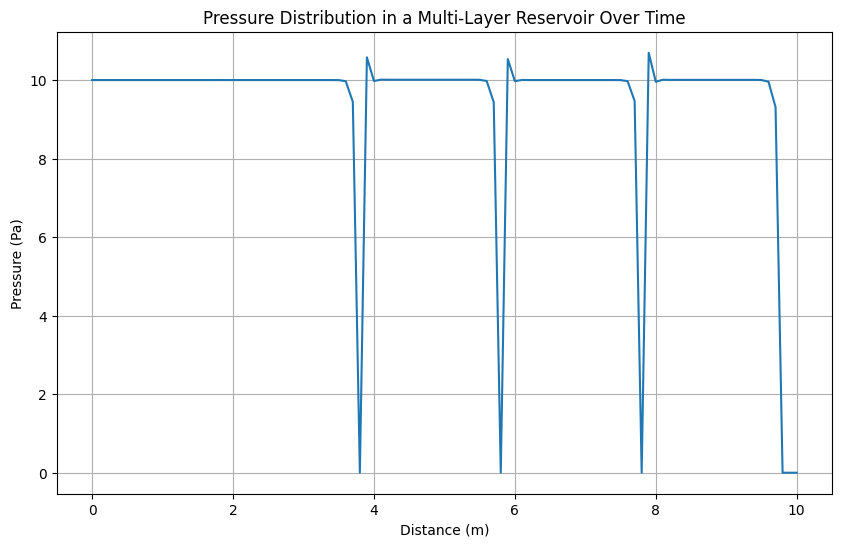

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for each layer: (C, phi, k, mu, thickness)
layers_params = [
    (1.0, 0.2, 0.01, 1.0, 2.0),   # Layer 1
    (1.5, 0.25, 0.02, 1.2, 2.0),   # Layer 2
    (1.2, 0.15, 0.015, 1.1, 2.0),  # Layer 3
    (1.8, 0.3, 0.025, 1.3, 2.0),   # Layer 4
    (1.3, 0.22, 0.018, 1.0, 2.0)   # Layer 5
]

# Total length of the reservoir
total_length = sum(layer[4] for layer in layers_params)

# Time parameters
T = 5            # Total time (s)
dt = 0.01        # Time step size (s)

# Discretization
dx = 0.1         # Spatial step size (m)
x = np.arange(0, total_length + dx, dx)
time_steps = int(T / dt)

# Initialize pressure array for each layer
P = np.zeros(len(x))   # Pressure array

# Assign initial pressure values to each layer
layer_boundaries = []
current_position = 0

for layer_index, (C, phi, k, mu, thickness) in enumerate(layers_params):
    start_index = int(current_position // dx)
    end_index = start_index + int(thickness // dx)
    layer_boundaries.append((start_index, end_index))

    # Ensure no overlap or underlap of layers
    end_index = min(end_index, len(x))  # Ensure we don't exceed the grid size
    P[start_index:end_index] = [10 + layer_index * 5] * (end_index - start_index)

    current_position += thickness

# Time-stepping loop
for t in range(time_steps):
    P_new = P.copy()

    for i in range(1, len(x) - 1):
        # Determine which layer the current index is in (precomputed)
        current_layer_index = next((layer_index for layer_index, (start, end) in enumerate(layer_boundaries)
                                    if start <= i < end), None)

        # Check if the current index is in a valid layer
        if current_layer_index is None:
            # print(f"Index {i} does not belong to any layer! Check the layer boundaries.")
            continue

        C, phi, k, mu, thickness = layers_params[current_layer_index]

        grad_P = (P[i + 1] - P[i - 1]) / (2 * dx)      # Central difference for gradient
        grad_k_mu = k / mu * grad_P

        # Update rule based on the rearranged equation
        P_new[i] += dt * (C * (10 - P[i]) + grad_k_mu) / (1 - phi)

    P = P_new

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x, P)
plt.title('Pressure Distribution in a Multi-Layer Reservoir Over Time')
plt.xlabel('Distance (m)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.show()


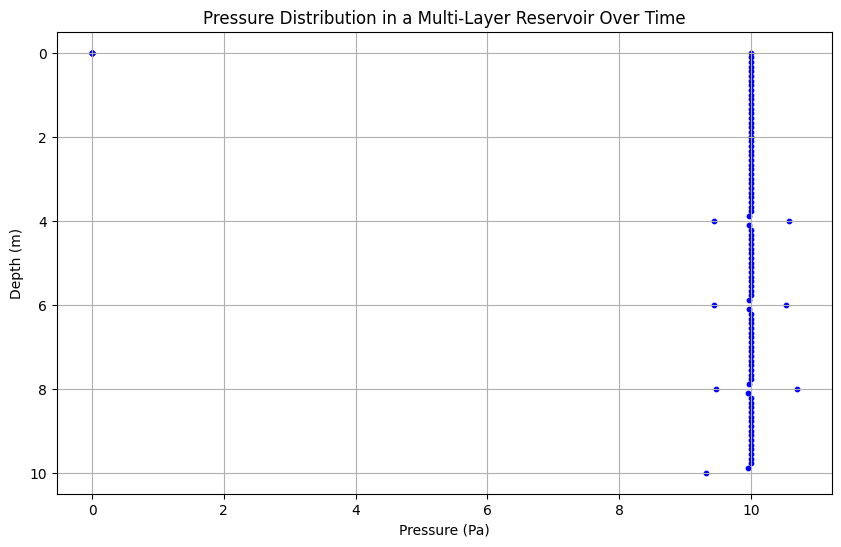

In [ ]:
rimport numpy as np
import matplotlib.pyplot as plt

# Parameters for each layer: (C, phi, k, mu, thickness)
layers_params = [
    (1.0, 0.2, 0.01, 1.0, 2.0),   # Layer 1
    (1.5, 0.25, 0.02, 1.2, 2.0),   # Layer 2
    (1.2, 0.15, 0.015, 1.1, 2.0),  # Layer 3
    (1.8, 0.3, 0.025, 1.3, 2.0),   # Layer 4
    (1.3, 0.22, 0.018, 1.0, 2.0)   # Layer 5
]

# Total length of the reservoir (sum of thicknesses)
total_length = sum(layer[4] for layer in layers_params)

# Time parameters
T = 5            # Total time (s)
dt = 0.01        # Time step size (s)

# Discretization
dx = 0.1         # Spatial step size (m)
x = np.arange(0, total_length + dx, dx)  # Distance array
time_steps = int(T / dt)

# Initialize pressure array for each layer
P = np.zeros(len(x))   # Pressure array

# Assign initial pressure values to each layer
layer_boundaries = []
current_position = 0

for layer_index, (C, phi, k, mu, thickness) in enumerate(layers_params):
    start_index = int(current_position // dx)
    end_index = start_index + int(thickness // dx)
    layer_boundaries.append((start_index, end_index))

    # Ensure no overlap or underlap of layers
    end_index = min(end_index, len(x))  # Ensure we don't exceed the grid size
    P[start_index:end_index] = [10 + layer_index * 5] * (end_index - start_index)

    current_position += thickness

# Create depth axis corresponding to the reservoir's layers
depth = np.zeros_like(x)

current_depth = 0
for layer_index, (C, phi, k, mu, thickness) in enumerate(layers_params):
    start_index = int(current_depth // dx)
    end_index = start_index + int(thickness // dx)
    depth[start_index:end_index] = np.linspace(current_depth, current_depth + thickness, end_index - start_index)
    current_depth += thickness

# Time-stepping loop
for t in range(time_steps):
    P_new = P.copy()

    for i in range(1, len(x) - 1):
        # Determine which layer the current index is in (precomputed)
        current_layer_index = next((layer_index for layer_index, (start, end) in enumerate(layer_boundaries)
                                    if start <= i < end), None)

        # Check if the current index is in a valid layer
        if current_layer_index is None:
            # print(f"Index {i} does not belong to any layer! Check the layer boundaries.")
            continue

        C, phi, k, mu, thickness = layers_params[current_layer_index]

        grad_P = (P[i + 1] - P[i - 1]) / (2 * dx)      # Central difference for gradient
        grad_k_mu = k / mu * grad_P

        # Update rule based on the rearranged equation
        P_new[i] += dt * (C * (10 - P[i]) + grad_k_mu) / (1 - phi)

    P = P_new

# Plotting results as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(P, depth, color='b', s=10)  # Scatter plot (blue dots, size 10)
plt.title('Pressure Distribution in a Multi-Layer Reservoir Over Time')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis to represent depth as increasing downwards
plt.show()


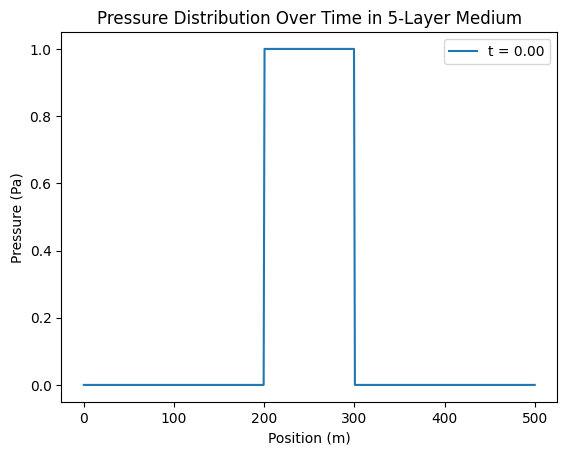

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_layers = 5  # Number of layers
n_points = 100  # Number of spatial points in each layer
n_time_steps = 1  # Number of time steps
dt = 1  # Time step size
dx = 1.0  # Spatial step size (distance between grid points)
T = 5.0  # Total time for simulation
L = n_layers * n_points * dx  # Total length of the medium

# Define properties for each layer (C, phi, k, mu)
C = [1e-3, 2e-3, 1e-3, 3e-3, 1e-2]  # Storage/Compressibility factor
phi = [0.2, 0.25, 0.3, 0.2, 0.18]  # Porosity
k = [1e-12, 1e-13, 5e-13, 1e-12, 3e-12]  # Permeability (m^2)
mu = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3]  # Fluid viscosity (Pa.s)

# Initial pressure distribution (arbitrary choice)
P_init = np.zeros(n_layers * n_points)
P_init[n_points * 2: n_points * 3] = 1  # Initial pressure pulse in the middle layer

# Initialize pressure array for each time step
P = np.copy(P_init)

# Time-stepping loop
for t in range(n_time_steps):
    P_new = np.copy(P)

    for i in range(1, n_layers * n_points - 1):
        # Determine the layer for the current point
        layer_index = i // n_points

        # Calculate the coefficients for this point
        alpha = (1 - phi[layer_index]) / C[layer_index]
        beta = k[layer_index] / mu[layer_index]  # Permeability over viscosity

        # Central Difference for the spatial second derivative
        d2P_dx2 = (P[i+1] - 2*P[i] + P[i-1]) / (dx**2)

        # Forward Euler for the time derivative
        P_new[i] = P[i] + alpha * dt * (beta * d2P_dx2)

    # Update the pressure field
    P = np.copy(P_new)


    # Optionally, print out or plot the pressure at certain time steps
    if t % 100 == 0:  # Every 100 steps, plot the pressure profile
        plt.plot(np.linspace(0, L, n_layers * n_points), P, label=f"t = {t * dt:.2f}")

# Plot the results
plt.xlabel('Position (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure Distribution Over Time in 5-Layer Medium')
plt.legend()
plt.show()


[0.         0.0375     1.         0.02666667 0.        ]
[0.         0.0721875  1.         0.05191111 0.        ]
[0.         0.10427344 1.         0.07580919 0.        ]


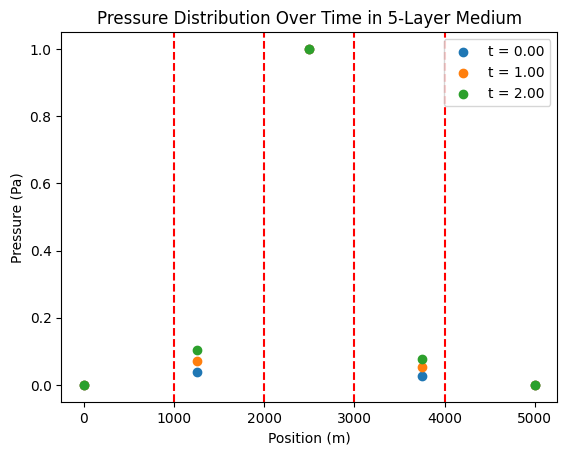

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_layers = 5  # Number of layers
n_points = 1  # Number of spatial points in each layer
n_time_steps = 3  # Number of time steps
dt = 1  # Time step size
dx = 1000.0  # Spatial step size (distance between grid points)
T = 5.0  # Total time for simulation
L = n_layers * n_points * dx  # Total length of the medium

# Define properties for each layer (C, phi, k, mu)
C = [1e-1, 2e-3, 1e-3, 3e-3, 1e-2]  # Storage/Compressibility factor
phi = [0.2, 0.25, 0.3, 0.2, 0.18]  # Porosity
k = [1e-12, 1e-1, 5e-13, 1e-1, 3e-12]  # Permeability (m^2)
mu = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3]  # Fluid viscosity (Pa.s)

# Initial pressure distribution (arbitrary choice)
P_init = np.zeros(n_layers * n_points)
P_init[n_points * 2: n_points * 3] = 1  # Initial pressure pulse in the middle layer

# Initialize pressure array for each time step
P = np.copy(P_init)

# Time-stepping loop
for t in range(n_time_steps):
    P_new = np.copy(P)

    for i in range(1, n_layers * n_points - 1):
        # Determine the layer for the current point
        layer_index = i // n_points

        # Calculate the coefficients for this point
        alpha = (1 - phi[layer_index]) / C[layer_index]
        beta = k[layer_index] / mu[layer_index]  # Permeability over viscosity

        # Central Difference for the spatial second derivative
        d2P_dx2 = (P[i+1] - 2*P[i] + P[i-1]) / (dx**2)

        # Forward Euler for the time derivative
        P_new[i] = P[i] + alpha * dt * (beta * d2P_dx2)

    # Update the pressure field
    P = np.copy(P_new)

    print(P)

    plt.scatter(np.linspace(0, L, n_layers * n_points), P, label=f"t = {t * dt:.2f}")

    # # Optionally, print out or plot the pressure at certain time steps
    # if t == 0:  # Since we are only taking one time step (t = 0), plot the pressure profile
    #     plt.scatter(np.linspace(0, L, n_layers * n_points), P, label=f"t = {t * dt:.2f}")

# Plot the results
plt.xlabel('Position (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure Distribution Over Time in 5-Layer Medium')

# Plot layer boundaries
for i in range(1, n_layers):
    layer_boundary_position = i * n_points * dx
    plt.axvline(x=layer_boundary_position, color='r', linestyle='--')

# Show the legend and plot the graph
plt.legend(loc='best')
plt.show()


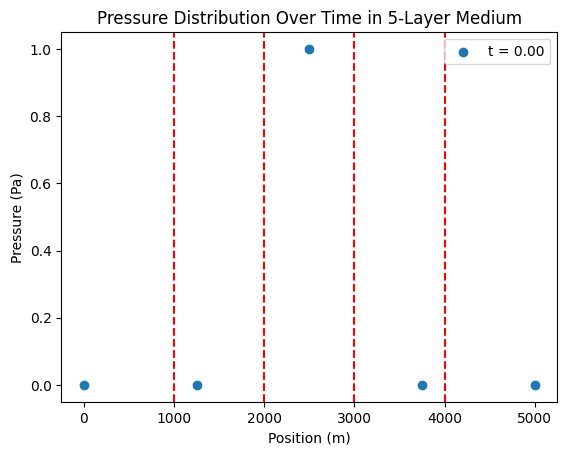

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_layers = 5  # Number of layers
n_points = 1  # Number of spatial points in each layer (increase for better resolution)
n_time_steps = 1  # Number of time steps
dt = 1  # Time step size

# Layer thicknesses (in meters)
layer_thicknesses = [1000, 1000, 1000, 1000, 1000]  # Thickness for each layer in meters
L = sum(layer_thicknesses)  # Total length of the medium

C = [0.83, 0.001, 0.31, 0.51, 0.31]
phi = [0.55, 0.01, 0.24, 0.18, 0.09]
k = [1e-15,  10e-20, 5e-12, 10e-14, 10e-13]
mu = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3]

# Initial pressure distribution (arbitrary choice)
P_init = np.zeros(n_layers * n_points)
P_init[n_points * 2: n_points * 3] = 1  # Initial pressure pulse in the middle layer

# Initialize pressure array for each time step
P = np.copy(P_init)

# Create a list to store positions based on layer thickness
positions = []
start_position = 0
for i in range(n_layers):
    end_position = start_position + layer_thicknesses[i]
    positions.append((start_position, end_position))  # store start and end positions for each layer
    start_position = end_position

# Define dx (distance between adjacent spatial points)
dx = L / (n_layers * n_points)  # For uniform grid spacing across the entire medium

# Time-stepping loop
for t in range(n_time_steps):
    P_new = np.copy(P)

    for i in range(1, n_layers * n_points - 1):
        layer_index = i // n_points

        alpha = (1 - phi[layer_index]) / C[layer_index]
        beta = k[layer_index] / mu[layer_index]  # Permeability over viscosity

        d2P_dx2 = (P[i+1] - 2*P[i] + P[i-1]) / (dx**2)

        P_new[i] = P[i] + alpha * dt * (beta * d2P_dx2)

    P = np.copy(P_new)

    plt.scatter(np.linspace(0, L, n_layers * n_points), P, label=f"t = {t * dt:.2f}")

plt.xlabel('Position (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure Distribution Over Time in 5-Layer Medium')

for i in range(1, n_layers):
    layer_boundary_position = sum(layer_thicknesses[:i])  # sum of thicknesses up to layer i
    plt.axvline(x=layer_boundary_position, color='r', linestyle='--')

plt.legend(loc='best')
plt.show()


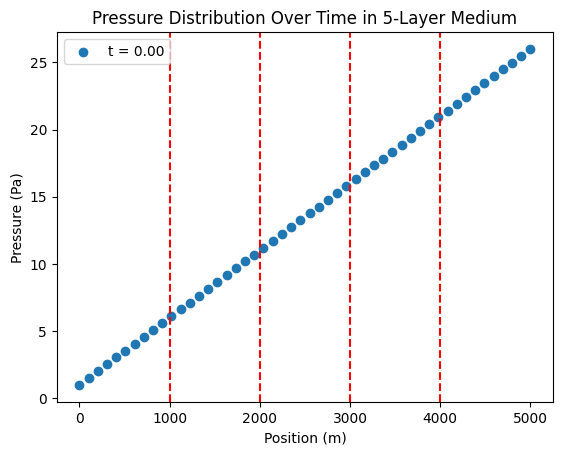

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_layers = 5  # Number of layers
n_points = 10  # Number of spatial points in each layer (increase for better resolution)
n_time_steps = 1  # Number of time steps
dt = 1  # Time step size

# Layer thicknesses (in meters)
layer_thicknesses = [1000, 1000, 1000, 1000, 1000]  # Thickness for each layer in meters
L = sum(layer_thicknesses)  # Total length of the medium

# Define properties for each layer (C, phi, k, mu)
C = [1e-3, 2e-3, 1e-3, 3e-3, 1e-2]  # Storage/Compressibility factor
phi = [0.2, 0.25, 0.3, 0.2, 0.18]  # Porosity
k = [1e-12, 1e-1, 5e-13, 1e-1, 3e-12]  # Permeability (m^2)
mu = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3]  # Fluid viscosity (Pa.s)

# Pressure gradient parameters
P_surface = 1  # Initial pressure at the surface (top)
gamma = 0.005
# Initial pressure distribution: linearly increasing with depth
P_init = np.zeros(n_layers * n_points)
positions = np.linspace(0, L, n_layers * n_points)
P_init = P_surface + gamma* positions  # Linear pressure increase with depth


# Initialize pressure array for each time step
P = np.copy(P_init)

# Create a list to store positions based on layer thickness
start_position = 0
positions = []
for i in range(n_layers):
    end_position = start_position + layer_thicknesses[i]
    positions.append((start_position, end_position))  # store start and end positions for each layer
    start_position = end_position

# Define dx (distance between adjacent spatial points)
dx = L / (n_layers * n_points)  # For uniform grid spacing across the entire medium

# Time-stepping loop
for t in range(n_time_steps):
    P_new = np.copy(P)

    for i in range(1, n_layers * n_points - 1):
        # Determine the layer for the current point
        layer_index = i // n_points

        # Calculate the coefficients for this point
        alpha = (1 - phi[layer_index]) / C[layer_index]
        beta = k[layer_index] / mu[layer_index]  # Permeability over viscosity

        # Central Difference for the spatial second derivative
        d2P_dx2 = (P[i+1] - 2*P[i] + P[i-1]) / (dx**2)

        # Forward Euler for the time derivative
        P_new[i] = P[i] + alpha * dt * (beta * d2P_dx2)

    # Update the pressure field
    P = np.copy(P_new)

    # Plot the pressure profile for this time step
    plt.scatter(np.linspace(0, L, n_layers * n_points), P, label=f"t = {t * dt:.2f}")

# Plot the results
plt.xlabel('Position (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure Distribution Over Time in 5-Layer Medium')

# Plot layer boundaries based on the layer thicknesses
start_position = 0
for i in range(1, n_layers):
    layer_boundary_position = sum(layer_thicknesses[:i])  # sum of thicknesses up to layer i
    plt.axvline(x=layer_boundary_position, color='r', linestyle='--')

# Show the legend and plot the graph
plt.legend(loc='best')
plt.show()


<ipython-input-3-6eb1f2682459>:47: RuntimeWarning: overflow encountered in scalar multiply
  dP_dt = (1 - phi / C) * (P_l - P[i]) / time_step  # Simplified pressure change rate


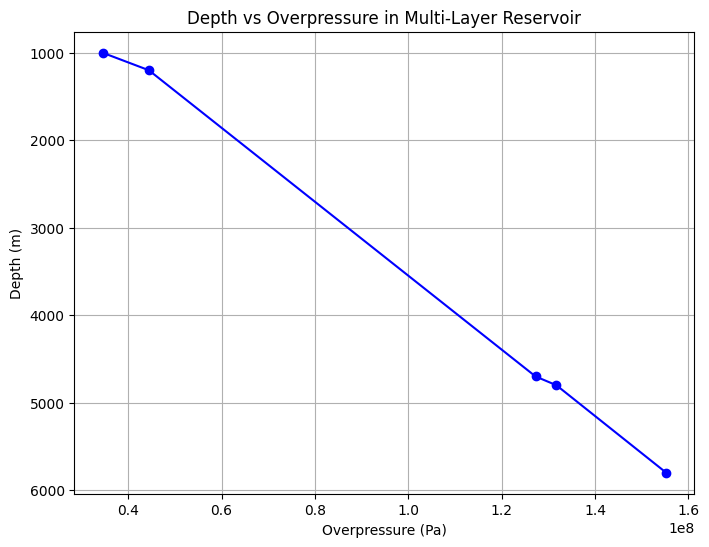

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 200, 3500, 100, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility, fluid pressure]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.2, 0.25, 0.3, 0.27, 0.23]),  # Porosity
    'k': np.array([1e-12, 2e-12, 1.5e-12, 1e-12, 1.2e-12]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([1e-9, 1e-9, 1e-9, 1e-9, 1e-9]),  # Compressibility (1/Pa)
    'P_l': np.array([10e6, 15e6, 12e6, 14e6, 13e6])  # Total fluid pressure in each layer (Pa)
}

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, density=2500, g=9.81):
    return density * g * depth  # Hydrostatic pressure (Pa)

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]
        P_l = parameters['P_l'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (P_l - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers)
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i] = calculate_overpressure(parameters['P_l'][i], P_overburden)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 6))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b')
plt.xlabel('Overpressure (Pa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Overpressure in Multi-Layer Reservoir')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward
plt.grid(True)
plt.show()


<ipython-input-4-57d7fb9c8468>:50: RuntimeWarning: overflow encountered in scalar multiply
  dP_dt = (1 - phi / C) * (P_l - P[i]) / time_step  # Simplified pressure change rate


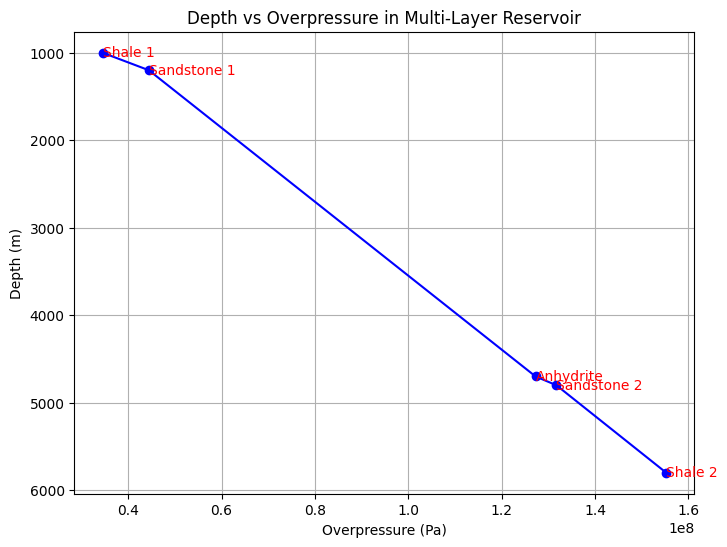

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 200, 3500, 100, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility, fluid pressure]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.2, 0.25, 0.3, 0.27, 0.23]),  # Porosity
    'k': np.array([1e-12, 2e-12, 1.5e-12, 1e-12, 1.2e-12]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([1e-9, 1e-9, 1e-9, 1e-9, 1e-9]),  # Compressibility (1/Pa)
    'P_l': np.array([10e6, 15e6, 12e6, 14e6, 13e6])  # Total fluid pressure in each layer (Pa)
}

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, density=2500, g=9.81):
    return density * g * depth  # Hydrostatic pressure (Pa)

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]
        P_l = parameters['P_l'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (P_l - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers)
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i] = calculate_overpressure(parameters['P_l'][i], P_overburden)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 6))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b')
plt.xlabel('Overpressure (Pa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Overpressure in Multi-Layer Reservoir')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, depths)):
    plt.text(overpressure[i], depth, name, ha='left', va='center', fontsize=10, color='red')

plt.grid(True)
plt.show()


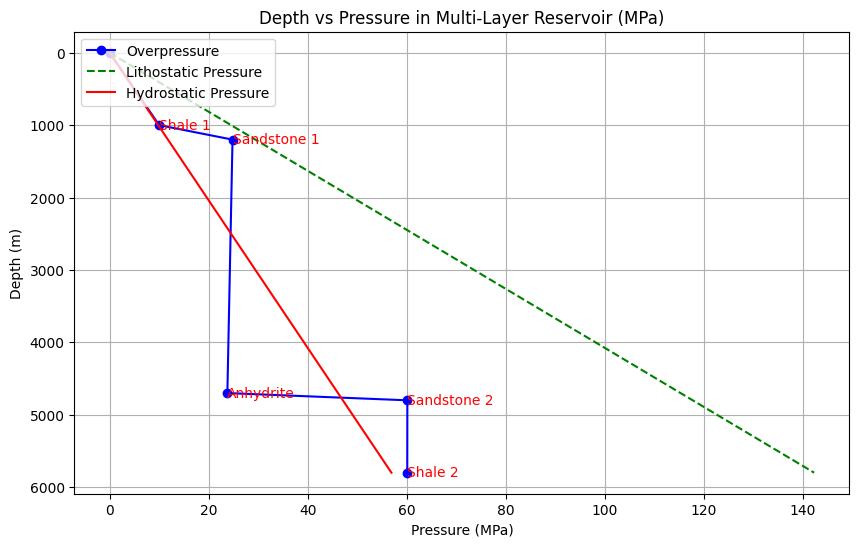

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 200, 3500, 100, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility, fluid pressure]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.7, 0.41, 0.01, 0.41, 0.41]),  # Porosity
    'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.83, 0.31, 0.0001, 0.51, 00.31]),  # Compressibility (1/Pa)
    'P_l': np.array([10e6, 15e6, 12e6, 14e6, 13e6])  # Total fluid pressure in each layer (Pa)
}

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, density=1000, g=9.81):  # density of fluid, e.g., water
    return density * g * depth  # Hydrostatic pressure (Pa)

# Lithostatic pressure (rock weight pressure) calculation
def calculate_lithostatic_pressure(depth, rock_density=2500, g=9.81):  # density of rock (kg/m^3)
    return rock_density * g * depth  # Lithostatic pressure (Pa)

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]
        P_l = parameters['P_l'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (P_l - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)  # Add to overpressure array

# Calculate lithostatic pressures for each depth
lithostatic_pressure = np.array([calculate_lithostatic_pressure(d) for d in depths])

# Calculate hydrostatic pressures for each depth (using the same formula as above)
hydrostatic_pressure = np.array([calculate_hydrostatic_pressure(d) for d in depths])

# Convert all pressures to MPa (1 MPa = 1e6 Pa)
overpressure /= 1e6
lithostatic_pressure /= 1e6
hydrostatic_pressure /= 1e6

# Plot the depth vs overpressure
plt.figure(figsize=(10, 6))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=10, color='red')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


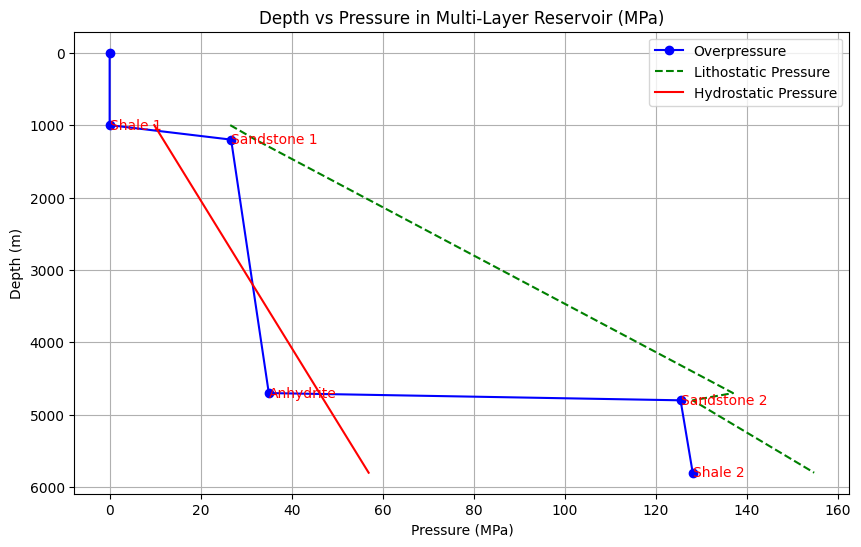

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 200, 3500, 100, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.7, 0.41, 0.01, 0.41, 0.41]),  # Porosity
    'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.83, 0.31, 0.0001, 0.51, 0.31]),  # Compressibility (1/Pa)
}

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, fluid_density=1000, g=9.81):  # density of fluid, e.g., water
    return fluid_density * g * depth  # Hydrostatic pressure (Pa)

# Lithostatic pressure (rock weight pressure) calculation
def calculate_lithostatic_pressure(depth, rock_density=2500, g=9.81):  # density of rock (kg/m^3)
    return rock_density * g * depth  # Lithostatic pressure (Pa)

# Initialize P_l values before the loop using lithostatic and hydrostatic pressures
P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
for i in range(num_layers):
    # Calculate hydrostatic pressure for the current layer
    hydrostatic_pressure = calculate_hydrostatic_pressure(depths[i], fluid_density)

    # Calculate lithostatic pressure for the current layer using the rock density of the current layer
    lithostatic_pressure = calculate_lithostatic_pressure(depths[i], rock_densities[i])

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lithostatic_pressure - hydrostatic_pressure

# Update parameters with the new P_l values
parameters['P_l'] = P_l

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)  # Add to overpressure array

# Convert all pressures to MPa (1 MPa = 1e6 Pa)
overpressure /= 1e6

# Calculate lithostatic and hydrostatic pressures for each depth (for plotting)
lithostatic_pressure = np.array([calculate_lithostatic_pressure(d, rock_densities[i]) for i, d in enumerate(depths[1:])])
hydrostatic_pressure = np.array([calculate_hydrostatic_pressure(d) for d in depths[1:]])

# Convert pressures to MPa (1 MPa = 1e6 Pa)
lithostatic_pressure /= 1e6
hydrostatic_pressure /= 1e6

# Plot the depth vs overpressure
plt.figure(figsize=(10, 6))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

# Plot lithostatic and hydrostatic pressures only for depths corresponding to layers
plt.plot(lithostatic_pressure, depths[1:], linestyle='--', color='g', label='Lithostatic Pressure')
plt.plot(hydrostatic_pressure, depths[1:], linestyle='-', color='r', label='Hydrostatic Pressure')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=10, color='red')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()


[   0 1000 2000 2002 4000 5000]
5
0 0 2700
1 1000 2720
2 2000 2970
3 2002 2720
4 4000 2720
[  0.         26.487      53.3664     58.3296714 106.7328    133.416    ] [ 0.       9.81    19.62    19.63962 39.24    49.05   ]


/var/folders/71/576pb5p91h58_y0m8bdv80380000gn/T/ipykernel_19943/3620621320.py:28: RuntimeWarning: invalid value encountered in log
  'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)


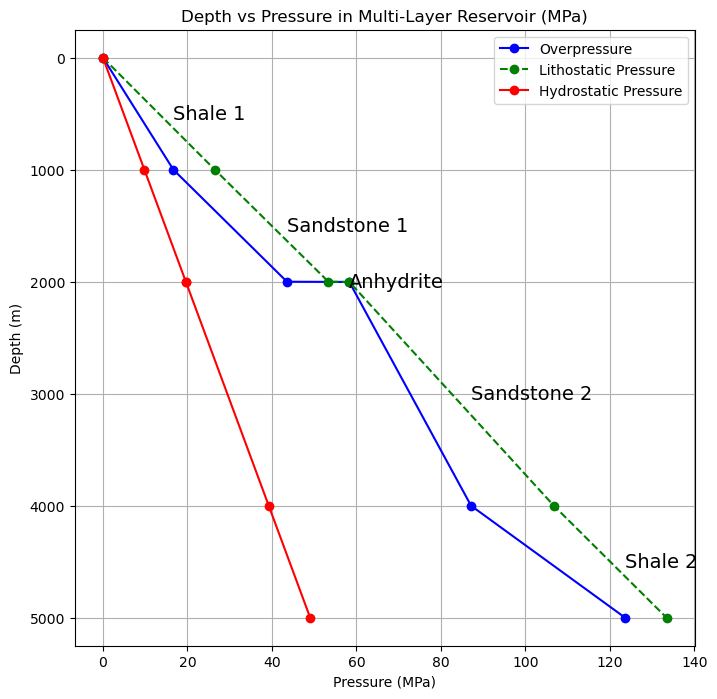

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

#  'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m^2)

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, fluid_density=1000, g=9.81):  # density of fluid, e.g., water
    return fluid_density * g * depth  # Hydrostatic pressure (Pa)

# Lithostatic pressure (rock weight pressure) calculation
def calculate_lithostatic_pressure(depth, rock_density, g=9.81):  # density of rock (kg/m^3)
    return rock_density * g * depth  # Lithostatic pressure (Pa)

# Initialize P_l values before the loop using lithostatic and hydrostatic pressures
P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
print(num_layers)
depths_new = depths[1::]
for i in range(num_layers):
    # Calculate hydrostatic pressure for the current layer
    hydrostatic_pressure = calculate_hydrostatic_pressure(depths_new [i], fluid_density)

    # Calculate lithostatic pressure for the current layer using the correct rock density for the layer
    print(i, depths[i], rock_densities[i])
    lithostatic_pressure = calculate_lithostatic_pressure(depths_new [i], rock_densities[i])

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lithostatic_pressure - hydrostatic_pressure

# Update parameters with the new P_l values
parameters['P_l'] = P_l

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)  # Add to overpressure array

# Convert all pressures to MPa (1 MPa = 1e6 Pa)
overpressure /= 1e6

# Calculate lithostatic and hydrostatic pressures for each depth (including the surface depth at 0m)
lithostatic_pressure = np.array([calculate_lithostatic_pressure(depths[i], rock_densities[i-1]) for i in range(1, num_layers + 1)])
hydrostatic_pressure = np.array([calculate_hydrostatic_pressure(depth) for depth in depths[1:]])


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lithostatic_pressure, 0, 0)
hydrostatic_pressure = np.insert(hydrostatic_pressure, 0, 0)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
lithostatic_pressure /= 1e6
hydrostatic_pressure /= 1e6

print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()



In [22]:
from scipy.integrate import quad

def hydrostatic_pressure_single(depth, sea_level, sediment_surface, water_depth, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.

    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)

    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)

    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]

    # Convert pressure to MPa and return
    return pressure / 1e6


In [ ]:
from scipy.integrate import quad

def lithostatic_pressure_single(depth, rock_density, porosity, sea_level, water_depth, sediment_surface):
    """
    Calculate lithostatic pressure at the given depth for a single layer.

    Parameters:
    - depth: The bottom depth of the layer (m)
    - rock_density: Density of the rock layer (kg/m^3)
    - porosity: Porosity of the rock layer (fraction)
    - sea_level: Elevation of the sea level (m, reference point)
    - water_depth: Depth of water column above the sediment (m)
    - sediment_surface: Elevation of the sediment surface (m)

    Returns:
    - Lithostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s^2)
    rho_sea = 1040  # Density of seawater (kg/m³)

    # Initialize total pressure
    total_pressure = 0

    water_pressure = rho_sea * g * water_depth

    # Handle case where sediment surface is below sea level
    if sediment_surface < 0:
        # Calculate effective density considering porosity
        effective_density = rock_density * (1 - porosity) + rho_sea * porosity

        # Add water pressure above the sediment
        water_pressure = rho_sea * g * water_depth

        # Calculate pressure increment due to overlying rock/sediment
        pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]

        # Total pressure (sum water and sediment contributions)
        total_pressure += water_pressure
        total_pressure += pressure_increment

    else:  # Case where sediment surface is at or above sea level
        # Calculate effective density considering porosity
        effective_density = rock_density * (1 - porosity) + rho_sea * porosity

        # Add water pressure above the sediment
        # water_pressure = rho_sea * g * water_depth

        # Calculate pressure increment due to overlying rock/sediment
        pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]

        # Total pressure (sum water and sediment contributions)
        # total_pressure += water_pressure
        total_pressure += pressure_increment

        print(water_pressure/1e6, pressure_increment/1e6
             )

    # Convert Pa to MPa and return
    return total_pressure / 1e6


[ 500. 1500. 2001. 3001. 4500.]
[1000 2000 2002 4000 5000]
5
0.0 19810314.000000004
0 2700 0.41 10.2024 19.810314000000005
0.0 44796384.0
1 2720 0.26 20.4048 44.796384
0.0 57950626.73400001
2 2970 0.01 20.4252048 57.95062673400001
0.0 86955840.00000001
3 2720 0.3 40.8096 86.95584000000001
0.0 125175600.00000001
4 2720 0.1 51.012 125.17560000000002
hjkl
[  0.          19.810314    44.796384    57.95062673  86.95584
 125.1756    ] [ 0.        10.2024    20.4048    20.4252048 40.8096    51.012    ]


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

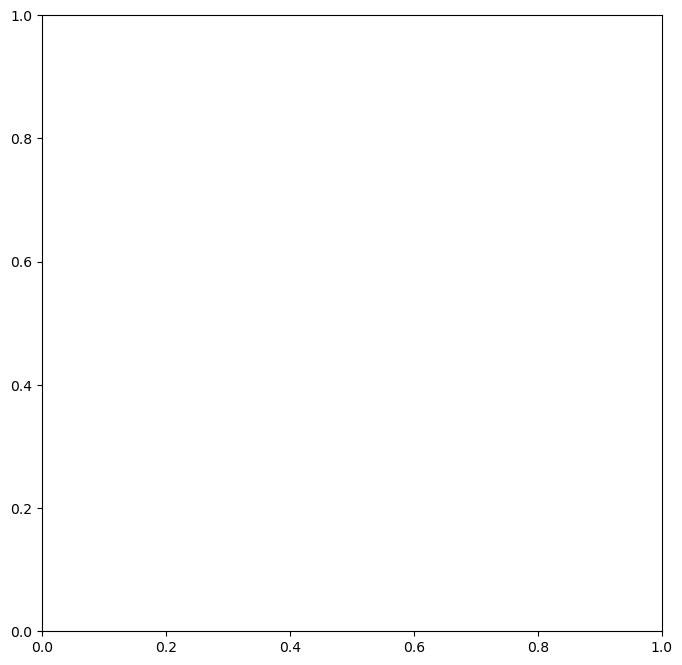

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters

# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters

num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

print(mid_depths)

# Add surface depth (0m) for the plot to start from the surface
# depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden


# Initialize P_l values before the loop using lithostatic and hydrostatic pressures
P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
print(num_layers)
depths_new = depths[0::]


SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL


for i in range(num_layers):
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(depths_new[i], sea_level=SEA_LEVEL, sediment_surface=SEDIMENT_SURFACE, water_depth=WATER_DEPTH, rho_water=1040)


    # Calculate lithostatic pressure for the current layer using the correct rock density for the layer
    lith_pres[i] = lithostatic_pressure_single(depths_new[i], rock_densities[i],
                                                       parameters['phi'][i], sea_level=SEA_LEVEL, water_depth=WATER_DEPTH, sediment_surface=SEDIMENT_SURFACE)


    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(i, rock_densities[i], parameters['phi'][i], hydro_pres[i], lith_pres[i])


# Update parameters with the new P_l values
parameters['P_l'] = P_l



# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
# lithostatic_pressure /= 1e6
# hydrostatic_pressure /= 1e6

print('hjkl')
print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))


# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward



# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.integrate import odeint

# import cv2
# from google.colab.patches import cv2_imshow

In [ ]:
# Constants
g = 9.81  # gravitational acceleration in m/s^2
rho_sea = 1100  # density of sea water in kg/m^3
rho_w = 1040  # density of pore water in kg/m^3
rho_shale = 2700  # density of shale in kg/m^3
rho_sandstone = 2720  # density of sandstone in kg/m^3
water_depth = 1000  # water depth hw = 1 km in meters

In [4]:
def hydrostatic_pressures(depths, sea_level, sediment_surface, water_depth, rho_water=1040):

    """
    Calculate cumulative hydrostatic pressures for each layer.

    Parameters:
    - depths: List or array of bottom depth of each layer (m)
    - water_depth: Depth of water (m)
    - sediment_surface: Depth of sediment surface (m)
    - rho_water: Constant value of sea water density (kg/m^3)

    Returns:
    - List of cumulative pressures (MPa) for each layer and depth array
    """

    g = 9.81  # acceleration due to gravity in m/s^2
    pressures = [quad(lambda z: rho_water * g, sea_level, depth)[0] / 1e6 for depth in depths]  # Convert Pa to MPa

    return pressures

In [13]:
def lithostatic_pressures(layer_bottom_depth, rock_densities, porosities, sea_level,
                          water_depth, sediment_surface):
    """
    Calculate cumulative lithostatic pressures for each layer.

    Parameters:
    - layer_thicknesses: List or array of thicknesses of each layer (m)
    - rock_densities: List or array of densities of each rock layer (kg/m^3)
    - porosities: List or array of porosity values for each layer (fraction)
    - water_depth: Constant value of a water depth (m)

    Returns:
    - List of cumulative pressures (MPa) for each layer
    """
    g = 9.81  # acceleration due to gravity in m/s^2
    rho_sea = 1100
    pressures = []
    total_depth = 0
    total_pressure = 0


    if sediment_surface < 0:

      filtered_depths = np.insert(layer_bottom_depth, 0, sediment_surface)
      rock_densities = np.insert(rock_densities, 0, 0)
      porosities = np.insert(porosities, 0, 0)    # Add sediment porosity at the start




      for depth, density, porosity in zip(filtered_depths, rock_densities, porosities):
        print('ghjfk')
        print(depth, density, porosity)

        total_pressure = 0
        effective_density = density * (1 - porosity) + rho_sea*porosity

        water_pressure = rho_sea * g * water_depth
        pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
        total_pressure += water_pressure
        total_pressure += pressure_increment

        print(total_pressure/1e6)

        pressures.append((total_pressure+water_pressure) / 1e6)  # Convert Pa to MPa

      return pressures

    else:

      filtered_depths = [depth for depth in layer_bottom_depth if depth > sediment_surface]
      filtered_depths.insert(0, sediment_surface)


      for depth, density, porosity in zip(filtered_depths, rock_densities, porosities):

          total_pressure = 0
          effective_density = density * (1 - porosity) + rho_sea*porosity

          water_pressure = rho_sea * g * water_depth

          pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
          total_pressure += water_pressure
          total_pressure += pressure_increment

          print(pressure_increment/1e6, total_pressure/1e6)

          pressures.append((total_pressure) / 1e6)  # Convert Pa to MPa

      return pressures

[   0 1000 2000 2002 4000 5000]
Hydrostatic pressures (MPa): [0.0, 10.202399999999999, 20.404799999999998, 20.425204799999996, 40.809599999999996, 51.01199999999999]
0.0 0.0
22.551228000000005 22.551228000000005
57.904506 57.904506
43.87491108 43.87491108
100.37592 100.37592
Lithostatic pressures (MPa): [0.0, 22.551228000000005, 57.904506, 43.87491108, 100.37592]


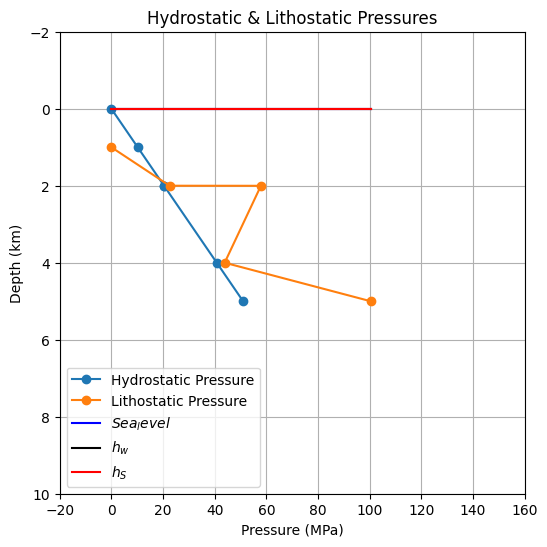

([0.0,
  10.202399999999999,
  20.404799999999998,
  20.425204799999996,
  40.809599999999996,
  51.01199999999999],
 [0.0, 22.551228000000005, 57.904506, 43.87491108, 100.37592])

In [15]:
def pressure(pressure_types):

    SEA_LEVEL = 0
    SEDIMENT_SURFACE = 0

    # Make initial data for calculation
    layer_thicknesses = np.array([0, 1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
    num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
    depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses
    print(depths)
    # N = 5
    layer_bottom_depth = depths  # thickness of each layer in meters
    rock_densities = np.array([2700, 2720, 2970, 2720, 2720])
    rock_densities = rock_densities
    porosities = np.array([0.41, 0.26, 0.01, 0.30, 0.1])  # porosity of each layer



    if SEDIMENT_SURFACE >=0:
      WATER_DEPTH = SEDIMENT_SURFACE
    else:
      WATER_DEPTH = SEA_LEVEL


    if 'hydrostatic' in pressure_types:
        pressures_hydrostatic = hydrostatic_pressures(layer_bottom_depth,
                                                      sea_level = SEA_LEVEL,
                                                      sediment_surface = SEDIMENT_SURFACE,
                                                      water_depth=WATER_DEPTH)
        print("Hydrostatic pressures (MPa):", pressures_hydrostatic)

    if 'lithostatic' in pressure_types:
        lith_pressures = lithostatic_pressures(layer_bottom_depth, rock_densities, porosities, sea_level=SEA_LEVEL,
                                               water_depth=WATER_DEPTH, sediment_surface=SEDIMENT_SURFACE)

        print("Lithostatic pressures (MPa):", lith_pressures)


    # Visualization

    plt.figure(figsize=(6, 6))
    ax1 = plt.subplot(1, 1, 1)

    if 'hydrostatic' in pressure_types:
        plt.plot(pressures_hydrostatic, layer_bottom_depth / 1000, label='Hydrostatic Pressure', marker='o')  # Convert depths to km
    if 'lithostatic' in pressure_types:

        if SEDIMENT_SURFACE < 0:
          depth_new = np.insert(layer_bottom_depth/1000, 0, SEDIMENT_SURFACE/1000)
          plt.plot(lith_pressures, depth_new, label='Lithostatic Pressure', marker='o')  # Convert layer depths to km
        else:
          depth_new = [depth/1000 for depth in layer_bottom_depth if depth > SEDIMENT_SURFACE]
          # depth_new.insert(0, np.abs(SEDIMENT_SURFACE/1000))
          plt.plot(lith_pressures, depth_new, label='Lithostatic Pressure', marker='o')  # Convert layer depths to km


    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [SEA_LEVEL*1e-3, SEA_LEVEL*1e-3], color='blue', label=f'$Sea_level$') # Sea water level (hw)

    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [WATER_DEPTH*1e-3, WATER_DEPTH*1e-3], color='black', label=f'$h_w$') # Sea water level (hw)

    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [SEDIMENT_SURFACE*1e-3, SEDIMENT_SURFACE*1e-3], color='RED', label=f'$h_S$') # Surface level (hs)


    plt.title('Hydrostatic & Lithostatic Pressures')
    plt.ylabel('Depth (km)')
    plt.xlabel('Pressure (MPa)')
    plt.ylim(10, -2)  # Set limits after converting depths to km
    plt.xlim([np.min(pressures_hydrostatic), np.max(lith_pressures)])
    plt.xlim(-20, 160)
    plt.legend()
    plt.grid(True)
    plt.show()

    return pressures_hydrostatic, lith_pressures

pressure(['hydrostatic', 'lithostatic'])

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

#  'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m^2)

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(hydrostatic_pressure, P_overburden):
    return P_l + P_overburden


def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.

    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².

    Returns:
        float: Lithostatic pressure for the given layer (Pa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity))/1e6

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")



# overpressure /= 1e6
# Update parameters with the new P_l values
parameters['P_l'] = P_l
# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step


# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure
for i in range(num_layers):
    P_overburden = lith_pres[i]  # Calculate hydrostatic pressure for each depth
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)  # Add to overpressure array
    print(overpressure[i+1])

# Convert all pressures to MPa (1 MPa = 1e6 Pa)
# overpressure /= 1e6

# # Calculate lithostatic and hydrostatic pressures for each depth (including the surface depth at 0m)
# lithostatic_pressure = np.array([calculate_lithostatic_pressure(depths[i], rock_densities[i-1]) for i in range(1, num_layers + 1)])
# hydrostatic_pressure = np.array([calculate_hydrostatic_pressure(depth) for depth in depths[1:]])


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)
Diff_press = np.insert(parameters['P_l'], 0, 0)

print(overpressure)
print(P_new/1e6)
# print(lithostatic_pressure, end='\n')
# print(hydrostatic_pressure, end='\n')
# print(Diff_press)


# print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()



[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001


<ipython-input-83-46d1406ccd4d>:29: RuntimeWarning: invalid value encountered in log
  'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)


ValueError: setting an array element with a sequence.

[  -154.50469714  -7247.47962786 -19636.64933577 -21876.67855751
  -5921.3848926 ]


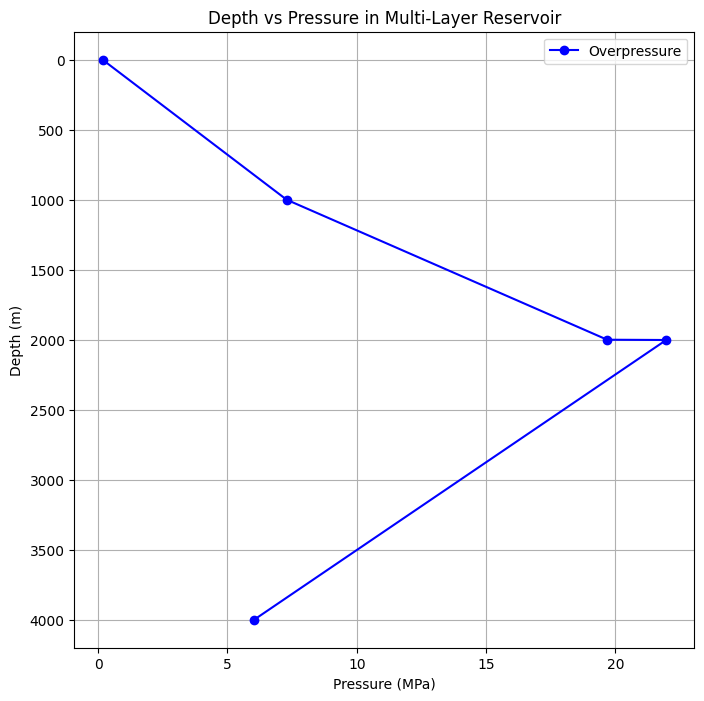

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)
depths = np.cumsum(layer_thicknesses)
depths = np.insert(depths, 0, 0)  # Include surface depth

layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities (kg/m³)
fluid_density = 1040  # Fluid density (kg/m³)

parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m²)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

# Time parameters
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Function to calculate hydrostatic pressure
def hydrostatic_pressure(depth, rho_water, g=9.81):
    return rho_water * g * depth / 1e6  # Pressure in MPa

# Function to calculate lithostatic pressure for a single layer
def lithostatic_pressure(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    return g * thickness * (rock_density * (1 - porosity) + rho_water * porosity) / 1e6  # Pressure in MPa

# Calculate lithostatic and hydrostatic pressures
hydro_pres = np.zeros(num_layers)
lith_pres = np.zeros(num_layers)
P_l = np.zeros(num_layers)

for i in range(num_layers):
    depth_mid = depths[i + 1]  # Depth of current layer bottom
    hydro_pres[i] = hydrostatic_pressure(depth_mid, fluid_density)
    lith_pres[i] = lithostatic_pressure(layer_thicknesses[i], rock_densities[i], parameters['phi'][i], rho_water=fluid_density)

# Accumulate lithostatic pressures
lith_pres = np.cumsum(lith_pres)

# Calculate P_l (lithostatic minus hydrostatic pressure)
P_l = lith_pres - hydro_pres

# Time-stepping loop for pressure evolution
P = np.zeros(num_layers)  # Initial pressure in layers
for step in range(num_steps):
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Pressure diffusion term
        if i > 0:
            diffusion_term = (k / mu) * (P[i - 1] - P[i]) / layer_thicknesses[i]
        else:
            diffusion_term = 0  # No diffusion from above surface

        # Update pressure using simplified equation
        dP_dt = (1 - phi / C) * P_l[i] / time_step + diffusion_term
        P[i] += dP_dt * time_step

# Calculate overpressure
overpressure = ((lith_pres-hydro_pres) - P)/1e3
print(hydro_pres +P)

# Plot results
plt.figure(figsize=(8, 8))
plt.plot(overpressure, depths[:-1], marker='o', linestyle='-', label='Overpressure', color='blue')
# plt.plot(lith_pres, depths[:-1], marker='o', linestyle='--', label='Lithostatic Pressure', color='green')
# plt.plot(hydro_pres, depths[:-1], marker='o', linestyle='-', label='Hydrostatic Pressure', color='red')

plt.gca().invert_yaxis()
plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir')
plt.legend()
plt.grid(True)
plt.show()


### Расчет

In [85]:
from scipy.integrate import quad

def hydrostatic_pressure_single(depth, sea_level, sediment_surface, water_depth, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.

    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)

    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)

    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]

    # Convert pressure to MPa and return
    return pressure / 1e6


def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.

    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².

    Returns:
        float: Lithostatic pressure for the given layer (Pa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity))/1e6


[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001


<ipython-input-87-1507b0c7146b>:29: RuntimeWarning: invalid value encountered in log
  'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)


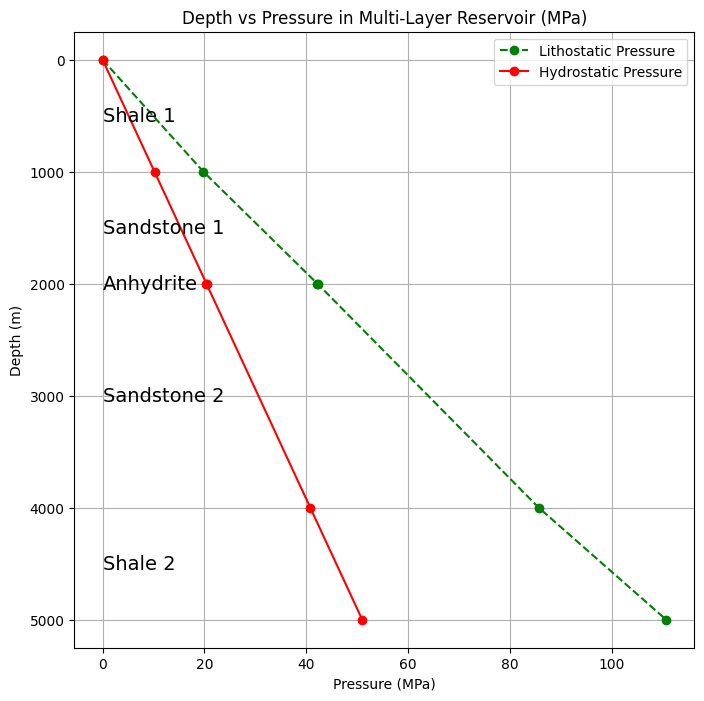

In [87]:

import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)



# print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001
[  0.           9.607914    32.006106    42.24599393  65.31644561
 100.53356081]


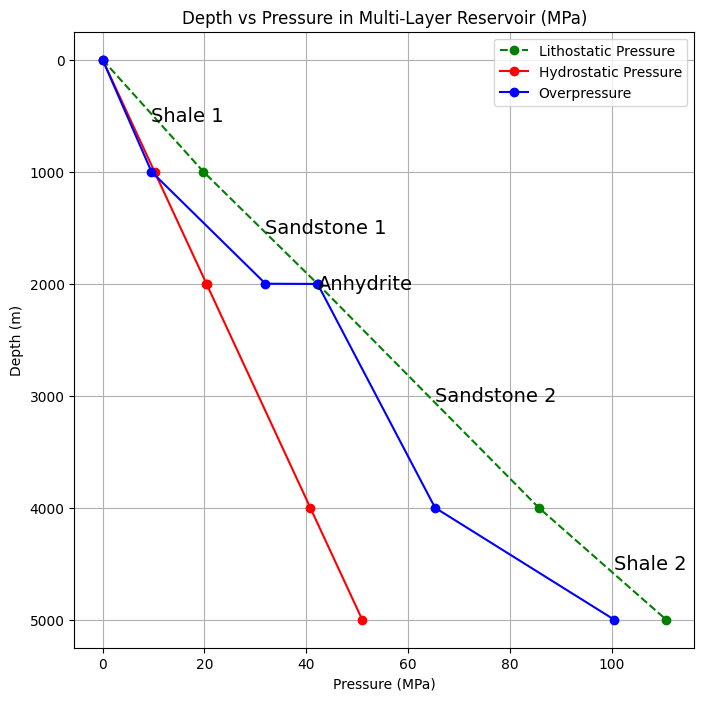

In [103]:

import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([10**-2.26, 10**3.16, 1e-16, 10**3.2, 10**-6.3]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.055]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Time parameters for pressure calculation (You can adjust these)
time_step = 1e6  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

parameters['P_l'] = P_l

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)


# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

# Function to calculate overpressure as a scalar
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Initialize overpressure array
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

for i in range(num_layers):
    # Calculate hydrostatic pressure for each layer
    P_overburden = hydrostatic_pressure_single(depths[i], sea_level=SEA_LEVEL, sediment_surface=SEDIMENT_SURFACE,
                                               water_depth=WATER_DEPTH, rho_water=1040)

    # Ensure the calculate_overpressure function returns a scalar and assign it to overpressure
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
# overpressure /= 1e6
print(overpressure)


# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

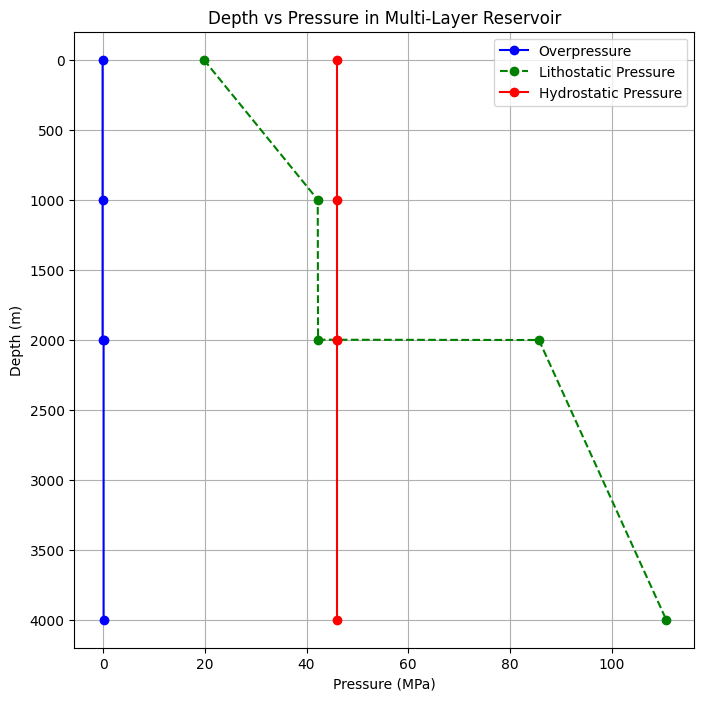

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

#  'k': np.array([1e-15, 5e-12, 1e-20, 1e-14, 1e-13]),  # Permeability (m^2)

# Time parameters for pressure calculation (You can adjust these)
time_step = 1e4  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium

# Function to calculate overpressure
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Hydrostatic pressure (overburden pressure) calculation
def calculate_hydrostatic_pressure(depth, fluid_density=1000, g=9.81):  # density of fluid, e.g., water
    return fluid_density * g * depth  # Hydrostatic pressure (Pa)

# Lithostatic pressure (rock weight pressure) calculation
def calculate_lithostatic_pressure(depth, rock_density, g=9.81):  # density of rock (kg/m^3)
    return rock_density * g * depth  # Lithostatic pressure (Pa)

# Initialize P_l values before the loop using lithostatic and hydrostatic pressures
P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
print(num_layers)
depths_new = depths[1::]
for i in range(num_layers):
    # Calculate hydrostatic pressure for the current layer
    hydrostatic_pressure = calculate_hydrostatic_pressure(depths_new [i], fluid_density)

    # Calculate lithostatic pressure for the current layer using the correct rock density for the layer
    print(i, depths[i], rock_densities[i])
    lithostatic_pressure = calculate_lithostatic_pressure(depths_new [i], rock_densities[i])

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lithostatic_pressure - hydrostatic_pressure

# Update parameters with the new P_l values
parameters['P_l'] = P_l

# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure
for i in range(num_layers):
    P_overburden = calculate_hydrostatic_pressure(depths[i])  # Calculate hydrostatic pressure for each depth
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)  # Add to overpressure array

# Convert all pressures to MPa (1 MPa = 1e6 Pa)
overpressure /= 1e6

# Calculate lithostatic and hydrostatic pressures for each depth (including the surface depth at 0m)
lithostatic_pressure = np.array([calculate_lithostatic_pressure(depths[i], rock_densities[i-1]) for i in range(1, num_layers + 1)])
hydrostatic_pressure = np.array([calculate_hydrostatic_pressure(depth) for depth in depths[1:]])


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lithostatic_pressure, 0, 0)
hydrostatic_pressure = np.insert(hydrostatic_pressure, 0, 0)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
lithostatic_pressure /= 1e6
hydrostatic_pressure /= 1e6

print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()



[1000 2000 2200 4198 5198]


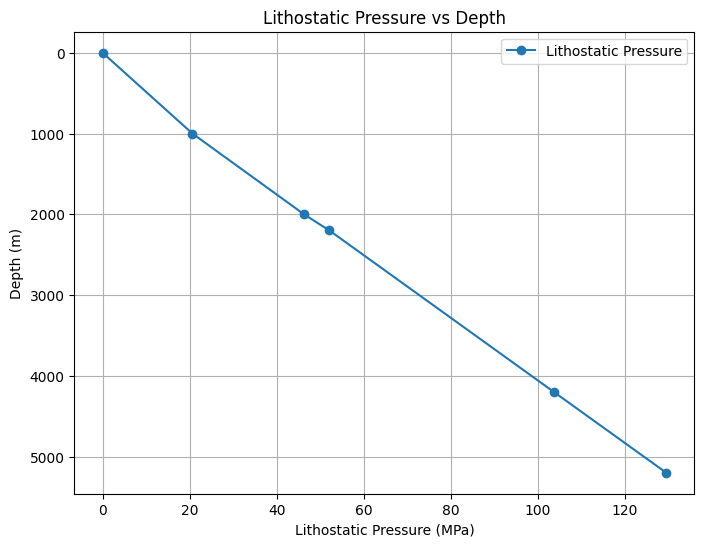

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravitational acceleration (m/s²)
rho_water = 1000  # Fluid density (water) in kg/m³

# Layer properties
layer_thicknesses = np.array([1000, 1000, 200, 1998, 1000])  # Thickness of each layer in meters
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer (kg/m³)
porosities = np.array([0.35, 0.06, 0.001, 0.051, 0.05])  # Porosity of each layer

# Compute depths and initialize lithostatic pressure array
depths = np.cumsum(layer_thicknesses)  # Depths at the bottom of each layer
print(depths)
lithostatic_pressure = np.zeros(len(depths))  # Initialize array for lithostatic pressure

# Calculate lithostatic pressure at each layer boundary
for i in range(len(layer_thicknesses)):
    # Contribution from current layer
    weight_contribution = g * layer_thicknesses[i] * (rock_densities[i] * (1 - porosities[i]) + rho_water * porosities[i])

    # Add contribution to the cumulative lithostatic pressure
    lithostatic_pressure[i] = lithostatic_pressure[i - 1] + weight_contribution if i > 0 else weight_contribution

# Add surface (0 pressure at the top)
depths = np.insert(depths, 0, 0)  # Add surface depth (0 m)
lithostatic_pressure = np.insert(lithostatic_pressure, 0, 0)  # Add zero pressure at surface

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(lithostatic_pressure / 1e6, depths, marker='o', label='Lithostatic Pressure')  # Convert pressure to MPa
plt.xlabel('Lithostatic Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Lithostatic Pressure vs Depth')
plt.gca().invert_yaxis()  # Depth increases downward
plt.grid(True)
plt.legend()
plt.show()
